# **Laborator 2: Metoda celor mai mici pătrate - Potrivirea unei linii la un set de puncte**

Scopul acestei lucrări de laborator este potirivirea unei linii la o mulţime de puncte 2D. Se va folosi metoda
celor mai mici pătrate. Se prezintă atât o soluţie iterativă cât şi o formulă directă pentru
mai multe modele ale dreptei.

## Fundamente teoretice

Se dă o mulţime de puncte bidimensionale de forma $(𝑥_𝑖, 𝑦_𝑖)$ unde 𝑖 = {1,2, … , 𝑛}.
Sarcina voastră este să găsiţi ecuaţia dreptei care se potriveşte cel mai bine la aceste puncte.
Vom utiliza regresie liniară (metoda celor mai mici pătrate). Mulţimea de puncte este
considerată ca mulţime de antrenare şi se doreşte potrivirea unui model liniar pe date. Vom folosi mai multe modele ale dreptei.


**Ex 1. Citirea si vizualizarea datelor**: Citiţi datele de intrare din fişierele text in folderul 'prs_res_LeastSquares'. Prima linie conţine numărul de puncte. Liniile următoare conţin perechi (x,y).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import copy

# Incarcati punctele dintr-un fisier text
# Prima linie contine numarul de puncte.
# Liniile urmatoare contin perechi (x,y) - coordonatele punctelor

x_train = []
y_train = []

## YOUR CODE HERE
file_path = 'prs_res_LeastSquares/points0.txt'
file = open(file_path , "r")
content = file.read()
        
lines = content.strip().split('\n')
dots = int(lines[0])
print("nr de pct =",dots)
data = np.loadtxt(lines[1:]) # (x,y) matrix  convertim lista de stringuri in array numeric 2D

print("Număr de puncte:", dots)
print("Date (x, y):\n", data)

x_train = data[:, 0] 
y_train = data[:, 1]

print(x_train)
print(y_train)

x_train = np.array(x_train)
y_train = np.array(y_train)
file.close()


#lab method 
#n = int(f.readline())
#for i in range(n):
 #   ss = f.readline().split()
 #   x = float(ss[0])
 #   y = float(ss[1])
 #   x_train.append(x)
 #  y_train.append(y)

nr de pct = 100
Număr de puncte: 100
Date (x, y):
 [[172.21  33.41]
 [185.87  48.36]
 [ 69.05  24.54]
 [187.01  44.81]
 [144.85  36.11]
 [ 64.63  29.92]
 [ 91.77  28.93]
 [132.03  39.61]
 [193.63  48.87]
 [194.73  53.87]
 [ 73.64  28.6 ]
 [195.59  34.73]
 [193.58  40.97]
 [122.81  42.74]
 [170.04  36.74]
 [ 71.28  34.07]
 [113.26  35.34]
 [187.36  51.54]
 [168.83  32.14]
 [193.92  44.22]
 [148.36  33.25]
 [ 55.36  41.74]
 [177.37  47.18]
 [190.1   51.61]
 [151.81  34.44]
 [163.66  38.93]
 [161.47  39.63]
 [108.83  39.64]
 [148.32  37.89]
 [ 75.68  33.35]
 [155.91  30.01]
 [ 54.77  25.35]
 [ 91.54  27.78]
 [ 56.93  19.52]
 [ 64.57  30.93]
 [173.52  43.97]
 [154.22  40.22]
 [ 97.56  26.02]
 [192.53  50.67]
 [ 55.17  28.92]
 [115.81  33.56]
 [107.23  34.05]
 [164.83  40.12]
 [169.28  33.26]
 [ 78.03  28.72]
 [123.46  31.89]
 [116.84  30.29]
 [146.95  33.32]
 [156.4   37.66]
 [163.2   31.2 ]
 [ 91.4   36.7 ]
 [151.96  42.35]
 [148.26  39.17]
 [ 74.39  29.5 ]
 [ 67.85  24.83]
 [124.75  41.3

**Ex2:** Afisati punctele pe o imagine alba. 

<function matplotlib.pyplot.show(close=None, block=None)>

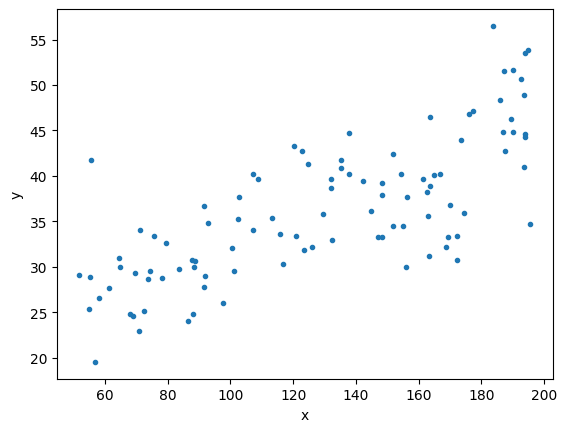

In [87]:
## YOUR CODE HERE
plt.scatter(x_train, y_train, marker='.')
plt.xlabel('x')
plt.ylabel('y')
plt.show


## Model 1 - dreapta bazată pe pantă și termen liber  

La orice metodă de potrivire primul pas constă în stabilirea modelului. La început
vom folosi un model liniar care conţine un termen pentru pantă ($𝜃_1$) şi un termen liber ($𝜃_0$).
Exprimăm componenta y ($f(x)$) în funcţie de x folosind funcţia:

$$
𝑓(𝑥) = 𝜃_0 + 𝜃_1𝑥 \tag{1}
$$

De obicei acest model este folosit pentru rezolvarea problemei. Însă această
reprezentare nu poate să modeleze linii verticale. Totuşi vom porni de la acest model
simplu. Se poate forma un vector care va conţine toţi parametrii $𝜽 = [𝜃_0, 𝜃_1]^{T}$
(termenul
liber şi coeficientul lui x).
Metoda curentă adopta o funcţie de cost care sumează erorile pătrate dintre
estimatorul nostru şi valorile originale. Modelul ideal va fi obţinut când funcţia de cost
atinge minimul global:

$$
𝐽(𝜃) = \frac{1}{2} \sum_{i=1}^{n} ( f(x_i) - y_i)^2 \tag{2}
$$

De ce o funcţie pătratică? Putem motiva această alegere prin presupunerea că eroarea în date
urmează o distribuţie gaussiană. O observaţie importantă este că această funcţie
penalizează erorile doar în direcţia y (segmentele marcate cu verde din graficul de mai jos) şi nu foloseşte distanţele punctelor la dreaptă. 

<p align="center">
  <img src="imgs/data_points.png" alt="image" width="400"/>
</p>

Asadar, dorim să găsim parametrii dreptei $𝜃_0$ si $𝜃_1$, astfel incât $f(x)$ este cât mai apropiat de $y$ pentru toate punctele din setul de antrenare. Vom minimiza funcţia de cost $J$ care sumează erorile pătrate dintre $f(x)$ si $y$ pentru fiecare exemplu de antrenare. Pentru a minimiza funcţia de cost $J$ vom calcula derivatele parţiale:

$$
\frac{𝜕}{𝜕𝜃_0}𝐽(𝜃) = \sum_{i=1}^{n} (f(x_i) - y_i)\tag{3}
$$

$$
\frac{𝜕}{𝜕𝜃_1}𝐽(𝜃) = \sum_{i=1}^{n} (f(x_i) - y_i) x_i\tag{4}
$$

**A. Metoda directă de calculare a parametrilor**

Funcţia de cost atinge minimul global când derivatele parţiale sunt nule. Ecuaţiile
pentru derivatele parţiale egale cu 0 se aduc la următoarea formă:
$$
𝜃_0𝑛 + 𝜃_1 \sum_{i=1}^{n}𝑥_𝑖 = \sum_{i=1}^{n}𝑦_𝑖\tag{5}
$$
$$
𝜃_0 \sum_{i=1}^{n}𝑥_𝑖 + 𝜃_1 \sum_{i=1}^{n}𝑥_𝑖^{2} = \sum_{i=1}^{n}𝑥_𝑖𝑦_i\tag{6}
$$
care este un sistem de ecuaţii liniare în două necunoscute şi poate fi rezolvat. Se obţin
valorile:
$$
𝜃_1 = \frac{𝑛 \sum_{i=1}^{n}𝑥_𝑖𝑦_𝑖 - \sum_{i=1}^{n}x_i \sum_{i=1}^{n}y_i}{𝑛\sum_{i=1}^{n}x_i^{2} - (\sum_{i=1}^{n} x_i)^{2}}\tag{7}
$$
$$
𝜃_0 = \frac{1}{n} (\sum_{i=1}^{n}y_i - 𝜃_1\sum_{i=1}^{n}x_i)\tag{8}
$$

**Ex3:** Folosiţi modelul 1 şi ecuațiile (7) și (8) pentru a calcula direct parametri. Vizualizaţi linia. Incercați să vectorizați operațiile atunci când este posibil. 

slope - th1 = 0.12892340691855478
intercept - th0 = 19.654350534211027


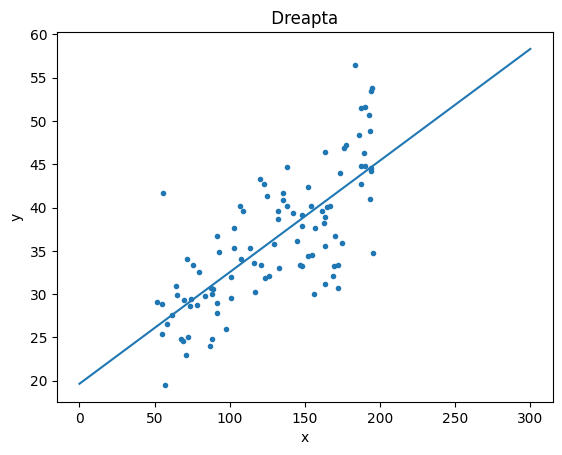

In [88]:
###YOUR CODE HERE###
n = len(x_train)
Sx = np.sum(x_train)
Sy = np.sum(y_train)

Sx2 = np.sum(x_train * x_train)
Sxy = np.sum(x_train * y_train)

th1 = (n * Sxy - Sx * Sy) / (n * Sx2 - Sx**2) 
th0 = (Sy - th1 * Sx) / n

print("slope - th1 =",th1)
print("intercept - th0 =",th0)

#linia 
x_min = 0
x_max = 300

y_min = th0 + th1 * x_min
y_max = th0 + th1 * x_max

plt.scatter(x_train, y_train, marker='.' )
plt.plot([x_min, x_max], [y_min, y_max])  # 2 puncte definesc linia
plt.title(' Dreapta ')
plt.xlabel('x'); 
plt.ylabel('y')
plt.show()


**B. Metoda de calculare a parametrilor folosind Gradient Descent**

O metodă generală pentru a găsi soluţia este gradient descent. Ideea este de a minimiza funcţia de cost. Deorece gradientul arată direcţia în care funcţia creşte cel mai mult, făcând un pas în direcţia opusă, valoarea funcţiei descreşte.
Dacă facem mai multe iteraţii şi controlăm mărimea paşilor vom atinge minimul global.
Deoarece funcţia de cost este pătrătică există un singur minimim global care va fi găsit de
această abordare.
La început se aleg valori aleatoare pentru parametrii. Apoi se
calculează gradientul în punctul curent:

$$
∇𝐽(𝜽) = \left[\frac{𝜕𝐽(𝜽)}{𝜕𝜃_0}, \frac{𝜕𝐽(𝜽)}{𝜕𝜃_1} \right]^T\tag{5}
$$

Şi apoi se aplică următoarea regulă de update a parametrilor până la convergenţă:
$$
𝜽_{𝑛𝑒𝑤} = 𝜽 − 𝛼∇𝐽(𝜽), \tag{6}
$$

unde $\alpha$ este rata de învăţare (valoarea pozitivă) şi este aleasă astfel încât funcţia de cost să descrească la fiecare iteraţie. Când valoarea funcției de cost devine suficient de mică algoritmul se opreşte. 

**Intuiția regulii de update a parametrilor**

<p align="center">
  <img src="imgs/gradient_descent_intuition.png" alt="image" width="500"/>
</p> 

- Dorim să găsim parametrii $\theta_1$ pentru care funcția de cost $J(\theta_1)$ este minimă
- Funcția de cost este o funcție convexă
- Pentru acest exemplu folosim o funcție de cost simplificată – $J(\theta_1)$
- Se alege o valoare inițială pentru $\theta_1$
- Gradientul funcției J in acest punct este o valoare pozitivă

Acest lucru se poate vedea geometric:
- Derivata funcției J in funcție de $\theta_1$ este panta tangentei la acel punct
- În acest exemplu, panta dreptei este pozitivă (y2-y1)/(x2-x1) 

Sau din tabelul de variație al funcției:

| $θ$                            | $-∞ → θ_{min}$          | $θ_{min}$    | $θ_{min} → +∞$          |
|------------------------------|---------------------|----------|---------------------|
| Semnul funcției J'(θ)             | -                   | 0        | +                   |
| Monotonia funcției J(θ)            | Scade           | Minim    | Crește              |


- Rata de învățare $\alpha$ are o valoare pozitivă
- Prin urmare, $\theta_1$ scade ($\theta_{new}$ = $\theta_1$ - valoare pozitivă) și se apropie de valoarea pe care vrem sa o găsim $\theta_{min}$  => J scade

**Algoritmul Gradient Descent** este următorul:

<p align="center">
  <img src="imgs/gd_alg.png" alt="image" width="300"/>
</p> 
                          

**B. Metoda de calculare a parametrilor folosind Gradient Descent**

O metodă generală pentru a găsi soluţia este gradient descent. Ideea este de a minimiza funcţia de cost. Deorece gradientul arată direcţia în care funcţia creşte cel mai mult, făcând un pas în direcţia opusă, valoarea funcţiei descreşte.
Dacă facem mai multe iteraţii şi controlăm mărimea paşilor vom atinge minimul global.
Deoarece funcţia de cost este pătrătică există un singur minimim global care va fi găsit de
această abordare.
La început se aleg valori aleatoare pentru parametrii. Apoi se
calculează gradientul în punctul curent:

$$
∇𝐽(𝜽) = \left[\frac{𝜕𝐽(𝜽)}{𝜕𝜃_0}, \frac{𝜕𝐽(𝜽)}{𝜕𝜃_1} \right]^T\tag{5}
$$

Şi apoi se aplică următoarea regulă de update a parametrilor până la convergenţă:
$$
𝜽_{𝑛𝑒𝑤} = 𝜽 − 𝛼∇𝐽(𝜽), \tag{6}
$$

unde $\alpha$ este rata de învăţare (valoarea pozitivă) şi este aleasă astfel încât funcţia de cost să descrească la fiecare iteraţie. Când valoarea funcției de cost devine suficient de mică algoritmul se opreşte. 

**Intuiția regulii de update a parametrilor**

<p align="center">
  <img src="imgs/gradient_descent_intuition.png" alt="image" width="500"/>
</p> 

- Dorim să găsim parametrii $\theta_1$ pentru care funcția de cost $J(\theta_1)$ este minimă
- Funcția de cost este o funcție convexă
- Pentru acest exemplu folosim o funcție de cost simplificată – $J(\theta_1)$
- Se alege o valoare inițială pentru $\theta_1$
- Gradientul funcției J in acest punct este o valoare pozitivă

Acest lucru se poate vedea geometric:
- Derivata funcției J in funcție de $\theta_1$ este panta tangentei la acel punct
- În acest exemplu, panta dreptei este pozitivă (y2-y1)/(x2-x1) 

Sau din tabelul de variație al funcției:

| $θ$                            | $-∞ → θ_{min}$          | $θ_{min}$    | $θ_{min} → +∞$          |
|------------------------------|---------------------|----------|---------------------|
| Semnul funcției J'(θ)             | -                   | 0        | +                   |
| Monotonia funcției J(θ)            | Scade           | Minim    | Crește              |


- Rata de învățare $\alpha$ are o valoare pozitivă
- Prin urmare, $\theta_1$ scade ($\theta_{new}$ = $\theta_1$ - valoare pozitivă) și se apropie de valoarea pe care vrem sa o găsim $\theta_{min}$  => J scade

**Algoritmul Gradient Descent** este următorul:

<p align="center">
  <img src="imgs/gd_alg.png" alt="image" width="300"/>
</p> 
                          

**Ex4:** Utilizaţi modelul 1 cu gradient descent. Tipăriţi valorile funcţiei de cost la fiecare iterație si afișati curba de cost pe un grafic (iterații vs cost). Trebuie să alegeţi o rată de învăţare care asigura descreşterea funcţiei de cost.

In [99]:
def cost_function(x, y, theta0, theta1):
    """
    Functia de cost
    Args:
        x (ndarray (n,)): Data, n samples
        y (ndarray (n,)): Target values
        theta0, theta1 (scalar): parametrii modelului
    Returns:
        cost (scalar): Costul functiei
    """
    ### YOUR CODE HERE ###
    m = x.size
    err = (theta0 + theta1 * x) - y
    return 0.5 * np.sum(err**2)

def compute_gradient(x, y, theta0, theta1):
    """
    Calculeaza gradientul pentru regresia liniara.
    Args:
        x (ndarray (n,)): Data, n samples
        y (ndarray (n,)): Target values
        theta0, theta1 (scalar): parametrii modelului
    Returns:
        dj_dtheta0 (scalar): Gradientul costului fata de theta0
        dj_dtheta1 (scalar): Gradientul costului fata de theta1
    """
    ### YOUR CODE HERE ####
    m = x.size
    err = (theta0 + theta1 * x) - y
    dj_dtheta0 = np.sum(err)
    dj_dtheta1 = np.sum(err * x)
    return dj_dtheta0 , dj_dtheta1

def gradient_descent(x, y, theta0_in, theta1_in, alpha, num_iters, T):
    """
    Functia implementeaza gradient descent pentru a calcula parametrii theta0 si theta1.

    Args:
      x (ndarray (n,))  : Data, n examples 
      y (ndarray (n,))  : Target values
      theta0_in, theta1_in (float): valorile initiale pentru parametrii modelului
      alpha (float):     Rata de invatare
      num_iters (int):   Numarul de iteratii
      T (float): prag pentru functia de cost
      
    Returns:
      theta_0 (scalar): Valoare parametrului dupa rularea gradient descent
      theta_1 (scalar): Valoare parametrului dupa rularea gradient descent
      J_history (ndarray (num_iters,)): Valorile funcției J la fiecare iterație
    """
    th0 = theta0_in
    th1 = theta1_in

    J_history = []
    for i in range(num_iters):
        J_current = cost_function(x, y, th0, th1)
        J_history.append(J_current)
        #if J_current <= T :
         #  break ;        
        dth0, dth1 = compute_gradient(x, y, th0, th1)
        th0_new = th0 - alpha * dth0 * 100
        th1_new = th1 - alpha * dth1
        th0, th1 = th0_new, th1_new

    return th0, th1, np.array(J_history)

    


19.653807689500436 0.12892716812180713


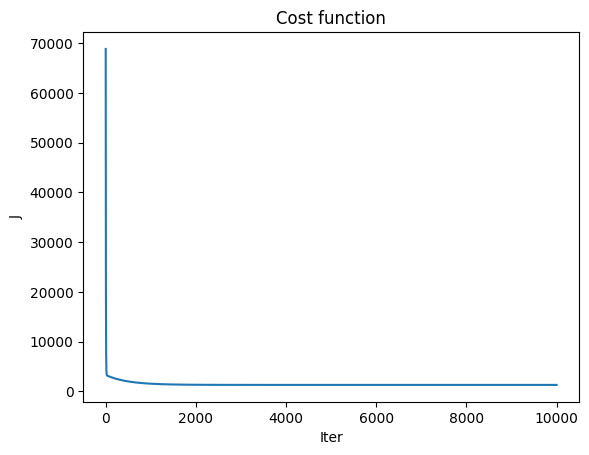

In [102]:
theta0_init = 0
theta1_init = 0
iterations = 10000
alpha = 1e-6
T = 20

theta0_final, theta1_final, J_history = gradient_descent(x_train, y_train, theta0_init, theta1_init, alpha, iterations, T)

print(theta0_final,theta1_final)
plt.plot(J_history)
plt.xlabel("Iter")
plt.ylabel("J")
plt.title("Cost function")
plt.show()


## Model 2 - dreapta în forma normală Hesse

Adoptăm un alt model pentru a rezolva problemele amintite în partea anterioară.
Acest model este capabil să trateze toate cazurile cu succes. Considerăm o parametrizare a unei drepte de forma:
$$
𝑥𝑐𝑜𝑠(𝛽) + 𝑦𝑠𝑖𝑛(𝛽) = \rho \tag{7}
$$
Aceasta descrie o dreaptă cu vectorul normal unitar de formă [𝑐𝑜𝑠(𝛽), 𝑠𝑖𝑛(𝛽)] care se află la o
distanţă 𝜌 de la origine. Parametrii dreptei sunt:
* x și y sunt coordonatele carteziene ale punctelor de pe dreaptă
* ρ este distanța perpendiculară de la origine la dreaptă
* β este unghiul dintre vectorul normal al dreptei (vector perpendicular pe dreaptă) și axa x pozitivă.

<p align="center">
  <img src="imgs/forma_normala_dreapta2.png" alt="image" width="400"/>
</p>

Scriem acum funcţia de cost care va fi suma distanţelor la pătrat de la fiecare punct
la dreaptă:
$$
𝐽(𝛽, 𝜌) = \frac{1}{2} \sum_{i=1}^{n}(𝑥_𝑖𝑐𝑜𝑠(𝛽) + 𝑦_𝑖𝑠𝑖𝑛(𝛽) − 𝜌)^{2} \tag{8}
$$
Observăm că aceasta reprezintă eroarea adevărată pe care trebuie să minimizăm şi
că funcţia de cost pentru modelul 1 măsoară doar discrepanţa pe axa y.
Derivatele parţiale au următoarea formă:
$$
\frac{𝜕𝐽}{𝜕𝛽} = \sum_{i=1}^{n}(𝑥_𝑖𝑐𝑜𝑠(𝛽) + 𝑦_𝑖𝑠𝑖𝑛(𝛽) − 𝜌)(−𝑥_𝑖𝑠𝑖𝑛(𝛽) + 𝑦_𝑖𝑐𝑜𝑠(𝛽))\tag{9}
$$
$$
\frac{𝜕𝐽}{𝜕𝜌} = −\sum_{i=1}^{n}(𝑥_𝑖𝑐𝑜𝑠(𝛽) + 𝑦_𝑖𝑠𝑖𝑛(𝛽) − 𝜌)\tag{10}
$$
Şi în acest caz putem să obţinem o soluţie directă, însă este mult mai dificil să rezolvăm
sistemul. Formulele pentru cei doi parametri sunt:
$$
𝛽 = − \frac{1}{2}𝑎𝑡𝑎𝑛2 \left(2\sum_{i=1}^{n}𝑥_𝑖𝑦_𝑖 − \frac{2}{n} \sum_{i=1}^{n}𝑥_𝑖 \sum_{i=1}^{n}𝑦_𝑖 , \sum_{i=1}^{n}(𝑦_𝑖^{2} − 𝑥𝑖^{2})+ \frac{1}{n}\left(\sum_{i=1}^{n}𝑥_𝑖\right)^{2} − \frac{1}{n}\left(\sum_{i=1}^{n}𝑦_𝑖\right)^{2}\right)\tag{11}
$$
$$
𝜌 = \frac{1}{n}\left(cos(𝛽)\sum_{i=1}^{n}𝑥_𝑖 + 𝑠𝑖𝑛(𝛽)\sum_{i=1}^{n}𝑦_𝑖\right)\tag{12}
$$

**Ex5**: Folosiţi modelul 2 şi ecuațiile (11) și (12) pentru a calcula direct parametrii. Vizualizaţi linia. 

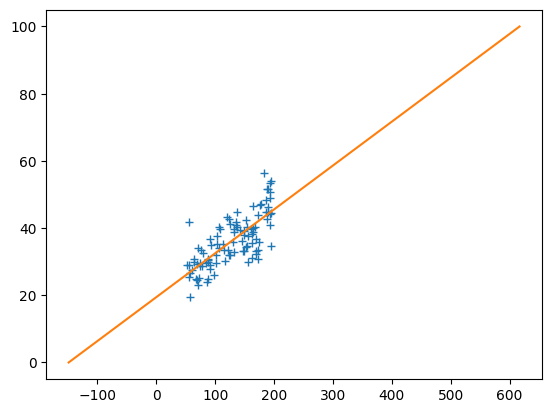

-1.4409345338384452 -19.27448330364019


In [117]:
### YOUR CODE HERE ###
import math 
x = x_train
y = y_train
n = len(x)

x_total = np.sum(x)
y_total = np.sum(y)

beta = -0.5 * math.atan2(2*np.sum(x*y)-2*np.sum(x)*np.sum(y)/n, np.sum(y**2 - x**2) + (np.sum(x)**2)/n - (np.sum(y)**2)/n)
ro  = (np.sum(x) * np.cos(beta) + np.sum(y) * np.sin(beta))/n

if np.abs(np.sin(beta)) > 5 :
    x1 = -1000
    x2 = -200
    y1 = (ro - np.cos(beta) * x1) / np.sin(beta)
    y2 = (ro - np.cos(beta) * x2) / np.sin(beta)
else :
    y1 = 0
    y2 = 100
    x1 = (ro - np.sin(beta) * y1) / np.cos(beta)
    x2 = (ro - np.sin(beta) * y2) / np.cos(beta)
    plt.plot(x, y, '+') 
    plt.plot([x1,x2],[y1,y2]) 

plt.show()
print(beta , ro)



## Model 3 - dreapta in forma generală

Există încă o posibilitate care oferă o rezolvare generală. Dacă folosim o
parametrizare cu 3 parametri:
$$
𝑎𝑥 + 𝑏𝑦 + 𝑐 = 0
$$
Această parametrizare tratează corect liniile verticale fiindcă acestea se modelează cu b=0.
Funcţia de cost se defineşte ca:
$$
𝐽(𝑎, 𝑏, 𝑐) = \frac{1}{2} \sum_{i=1}^{n}(𝑎𝑥_𝑖 + 𝑏𝑦_𝑖 + 𝑐)^{2}
$$
care poate fi scris vectorial sub forma unei norme care trebuie minimizat:
$$
𝐽(𝑎, 𝑏, 𝑐) = (𝐴𝜽)^{T}𝐴𝜽
$$
unde A este o matrice cu nx3 elemente, fiecare linie conţine $(𝑥_𝑖, 𝑦_𝑖, 1)$ şi $𝜽 = [𝑎, 𝑏, 𝑐]^{𝑇}$
este vectorul de parametri (un vector coloană). Observăm ca funcţia de cost diferă faţă de cea
definită la partea cu ecuaţia normală.
Utilizarea unui model cu 3 parametri are două consecinţe relevante: se poate
modela orice linie dar pentru o linie avem mai multe parametrizări echivalente. Pentru a
rezolva problema ambiguităţii impunem restricţia ca 𝜽 să aibă normă unitară. Soluţia la această problemă utilizează descompunerea cu valori singulare (Singular Value
Decomposition SVD). Descompunem A în trei matrici:

$$
A=USV
$$
unde U şi V sunt ortogonale şi S conţine valori nenule doar pe diagonală (valori singulare).
Soluţia se citeşte ca şi ultima coloana din matricea V care corespunde la valoarea singulară
cea mai mică. Pentru mai multe detalii consultaţi [2].
$$
𝜃_{𝑜𝑝𝑡} = 𝑉(: , -1)
$$

**Ex6:** Opţional, utilizaţi modelul 3 pentru a găsi ecuaţia dreptei.

In [50]:
### YOUR CODE HERE ###
x = x_train 
y = y_train 


### **Concluzie**
În acest laborator, ați învățat cum să aplicați algoritmul celor mai mici pătrate pentru a potrivi o linie unui set de puncte.

**Referinte**
1. Stanford Machine Learning - course notes 1 –
http://cs229.stanford.edu/notes/cs229-notes1.pdf
2. Tomas Svoboda - Least-squares solution of Homogeneous Equations -
http://cmp.felk.cvut.cz/cmp/courses/XE33PVR/WS20072008/Lectures/Supporting/constr
ained_lsq.pdf